# The percentile bootstrap confidence intervals

We introduce here a different version of the bootsrap confidence interval. Altough it is very popular, it is based on more assumptions. Here we assume that the sampling distribution for $\hat\theta$ is known and that it is **symmetric around $\theta$**; see below.

<div>
<img src="middle90sym.jpg" width="400"/>
</div>

Then, $U_1-\theta=\theta-L_1=W$ (reflecting the width of this distribution). From the picture above, with probability 0.90:
$$|\hat\theta-\theta|\leq W$$
leading to 
$$\hat\theta-W\leq \theta\leq \hat\theta+W$$

We call $[ \hat\theta-W, \hat\theta+W]$ a **90\% confidence interval**.
This can be approximated by $[L_1,U_1]$ and we call this a 90\% confidence interval.

It leads to the following procedure for obtaining a confidence interval:
- use bootstrap to obtain an estimate of the sampling distribution of $\hat\theta$.
- from the bootstrap distribution calculate the empirical percentiles $L_1^b$ and $U_1^b]$
- $[L_1^b,U_1^b]$ is called **a percentile bootstrap CI**.

We will illustrate this with the salary data - let's assume that the interest now is on the population mean (the average salary of the City of Chicago employees).

In [13]:
# the parameter of interest
theta=population_salary['Annual Salary'].mean()

np.random.seed(3322)

# this is a SRS of size n=80
sample_salary=population_salary.sample(80,replace=False)

#the average salary in the sample
theta_hat=sample_salary['Annual Salary'].mean()

[theta,theta_hat]

[100382.64415185722, 97993.725]

Above, we calculate the average salary in the population ($100,382.6$) and in a simple random sample of size 80 ($97,993.7). Below, we define a function that is very similar to the one introduced in the previous section, that generates bootstrap means needed for the approximation of the sampling distribution.

In [14]:
def bootstrap_mean(original_sample, label, replications):
    """Simulate sample means:
    original_sample: df containing the original sample data
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample means
    """
    means = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample(len(original_sample),replace=True)
        resampled_mean = bootstrap_sample['Annual Salary'].mean()
        means = np.append(means, resampled_mean)
        
    return means


In [15]:
bstrap_means = bootstrap_mean(sample_salary, 'Annual.Salary', 1000)

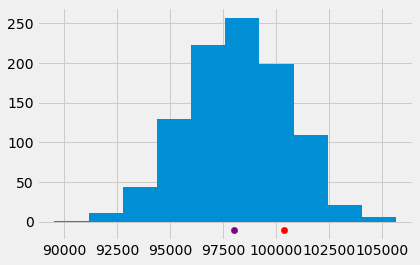

In [16]:
plt.hist(bstrap_means)
plt.scatter(theta_hat, -10, color='purple', s=40)
plt.scatter(theta, -10, color='red', s=40);

The above histogram is ou approximation for the sampling distribution of $\hat\theta$. The purple dot is the location of the average salary in our sample, and the red dot is the location of the average salary in the population.

In [17]:
left = np.percentile(bstrap_means, 2.5)
right = np.percentile(bstrap_means,97.5)

# a 95% CI
[left,right]

[93339.230625, 102538.108125]

The 95% confidence interval for the average salary in the city of Chicago is [933339.2,102538.1].